In [41]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/setuptools/_vendor/packaging/_pars

In [42]:
%pip


Usage:   
  /usr/local/bin/python3 -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion   

In [43]:
import tensorflow as tf
import os

In [44]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [45]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [46]:
img = cv2.imread(os.path.join("data", "Evaluation_Set", "Validation", "284.png"))
img.shape

(1424, 2144, 3)

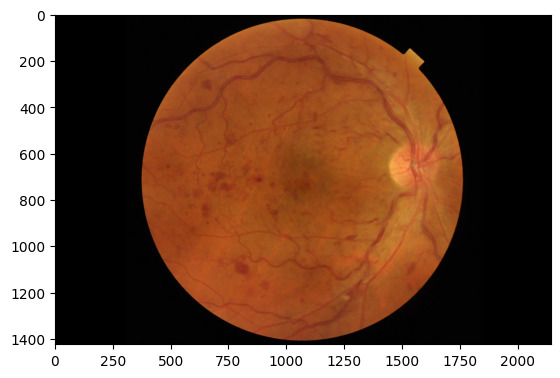

In [47]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [10]:
import numpy as py
from matplotlib import pyplot as plt

In [45]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your 

In [11]:
training_data = tf.keras.utils.image_dataset_from_directory('data/Training_Set/Training/')
eval_data = tf.keras.utils.image_dataset_from_directory('data/Evaluation_Set/Validation/')
testing_data = tf.keras.utils.image_dataset_from_directory('data/Test_Set/Test/')

Found 802 files belonging to 2 classes.
Found 268 files belonging to 2 classes.
Found 268 files belonging to 2 classes.


In [12]:
data_iterator_training = training_data.as_numpy_iterator()
data_iterator_eval = eval_data.as_numpy_iterator()
data_iterator_testing = testing_data.as_numpy_iterator()

In [13]:
batch_training = data_iterator_training.next()
batch_eval = data_iterator_eval.next()
batch_testing = data_iterator_testing.next()

In [14]:
batch_training[0].shape

(32, 256, 256, 3)

In [15]:
#0 normal?
#1 not normal
batch_training[1]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

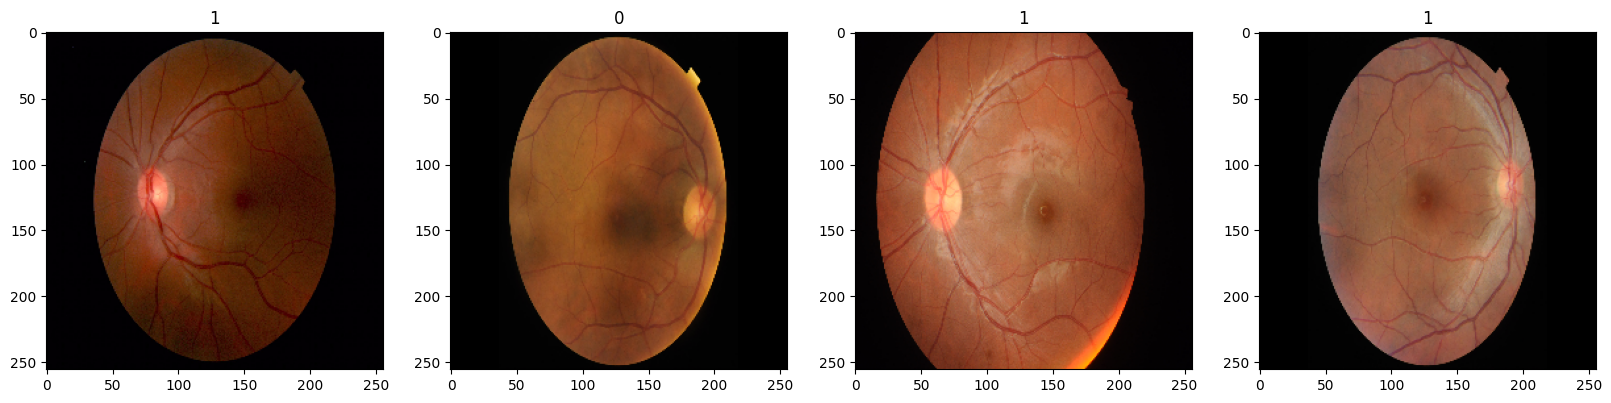

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_training[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_training[1][idx])

In [17]:
batch_training[0].max()

255.0

In [18]:
training_data = training_data.map(lambda x,y: (x/255,y))
eval_data = eval_data.map(lambda x,y: (x/255,y))
testing_data = testing_data.map(lambda x,y: (x/255,y))

In [19]:
data_iterator_training_scaled = training_data.as_numpy_iterator()
data_iterator_eval_scaled = eval_data.as_numpy_iterator()
data_iterator_testing_scaled = testing_data.as_numpy_iterator()

In [20]:
batch_training_scaled = data_iterator_training_scaled.next()
batch_eval_scaled = data_iterator_eval_scaled.next()
batch_testing_scaled = data_iterator_testing_scaled.next()

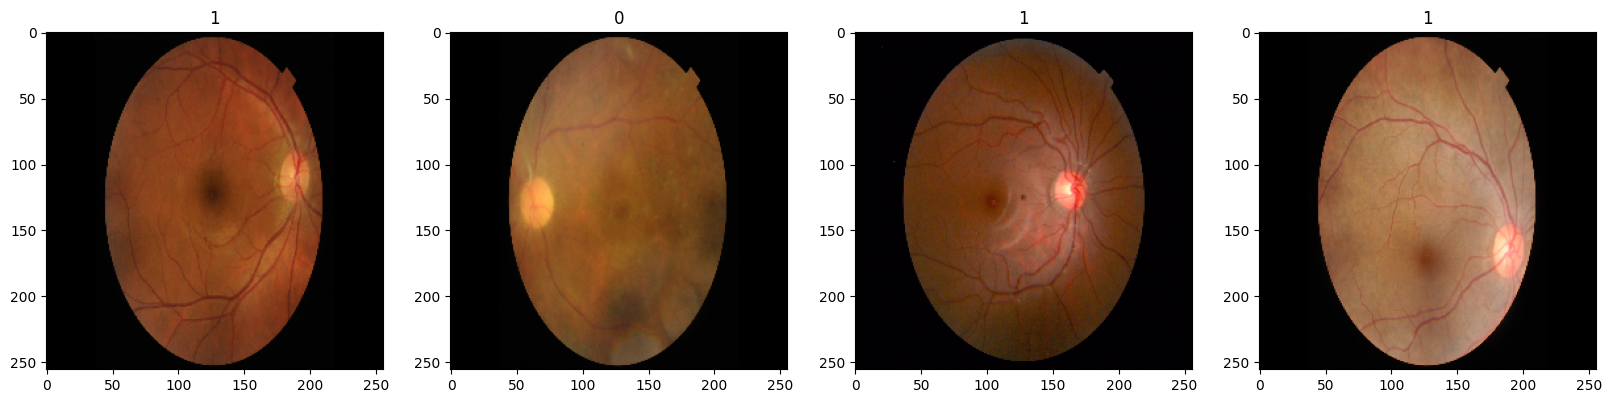

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_training_scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_training_scaled[1][idx])

In [22]:
len(training_data)

26

In [23]:
len(testing_data)

9

In [24]:
len(eval_data)

9

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(training_data, epochs=20, validation_data=eval_data, callbacks=[tensorboard_callback])

Epoch 1/20


26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 698ms/step - accuracy: 0.5587 - loss: 0.6826 - val_accuracy: 0.6418 - val_loss: 0.6412
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 644ms/step - accuracy: 0.6546 - loss: 0.6196 - val_accuracy: 0.6157 - val_loss: 0.6505
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 717ms/step - accuracy: 0.5549 - loss: 0.6580 - val_accuracy: 0.5672 - val_loss: 0.7628
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 667ms/step - accuracy: 0.6295 - loss: 0.6630 - val_accuracy: 0.6978 - val_loss: 0.6305
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 654ms/step - accuracy: 0.6865 - loss: 0.5992 - val_accuracy: 0.6716 - val_loss: 0.6256
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 726ms/step - accuracy: 0.6680 - loss: 0.6060 - val_accuracy: 0.5970 - val_loss: 0.6256
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 701ms/step - accuracy: 0.7030 - loss: 0.5578 - val_accuracy: 0.6903 - val_loss: 0.5766
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 734ms/step - accuracy: 0.7346 - loss: 0.5547 - val_accuracy: 0.664

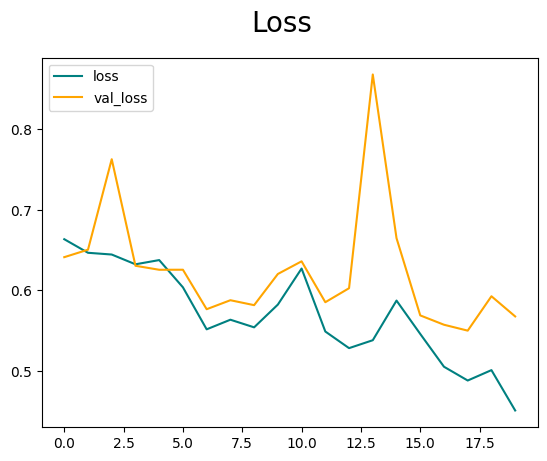

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

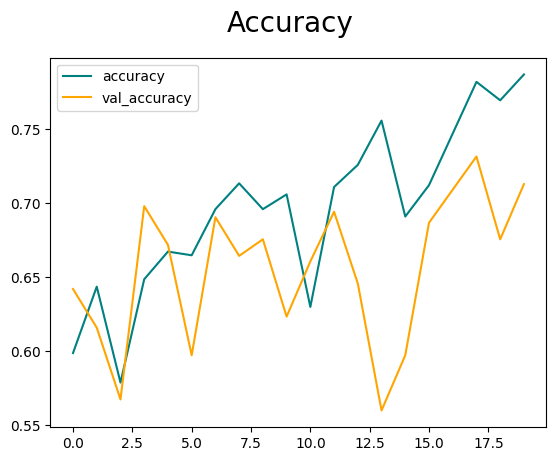

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re =Recall()
acc = BinaryAccuracy()

In [37]:
for batch in testing_data.as_numpy_iterator():
    X ,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


2024-03-06 12:18:41.139181: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.6632124185562134, Recall:0.9552238583564758, Accuracy:0.7350746393203735


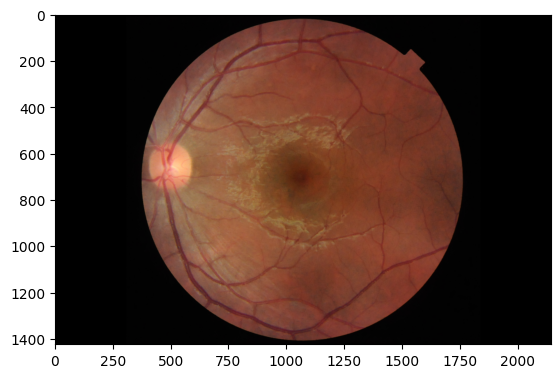

In [39]:
img = cv2.imread('data/Test_Set/Test/Normal/245.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

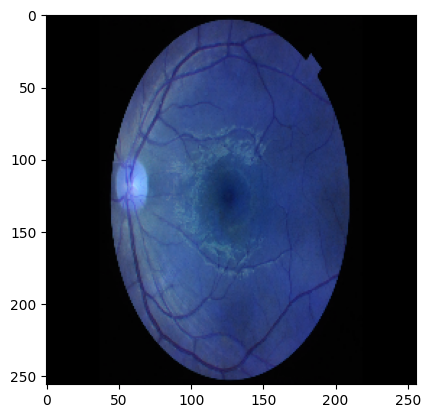

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
import numpy as np
np.expand_dims(resize,0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [42]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [43]:
yhat

array([[0.35760665]], dtype=float32)

In [44]:
if yhat > 0.5:
    print(f'Predicted image is abnormal')
else:
    print(f'Predicted image is normal')

Predicted image is normal
